<a href="https://colab.research.google.com/github/Tdanso/python-random-quote/blob/master/Copy_of_Test02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence
# Test 2

**Instructions**
- Test time: **Monday, May 24th, 1:30 - 3:30 pm**
- Total score: 100 points
- **Before you start,** make sure that you save a copy of this notebook in your Google Drive using the option "Save a copy in Drive" from the "File" menu.
- There are two types of questions:
    - **Short answer questions**: you are expected to write your response in detail in the text cells corresponding to these questions.
    - **Coding questions**: you are expected to write correct Python statements, and show the execution results.
- This is an open-book test. You can use the textbook and the class notes to help you solve the problems.
- You can use functions imported from `sklearn`, `numpy`, `pandas`, and `matplotlib`.
- **When you finish the test**, please download the notebook as a PDF file using the "Print" option from the "File" menu (choose "Print to PDF"). Submit the PDF file to Blackboard under the "Test 1" assignment before the end of the test.
- **If you have any questions**, please join the class Zoom meeting 202 609 9616 and ask me.

## Question 1 (10 pts)

Which of the following graphs indicate that the model (blue line) is overfitting the data (orange points)? Which graphs indicate underfitting?

<img src="https://github.com/ch00226855/ImputationGAN/blob/master/Test02Img01.png?raw=true" width="600">


**Write your answers here (double-click this line to enable editing):**


Overfitting refers to a modeling error that occurs when a function corresponds too closely to a dataset. As a result, overfitting may fail to fit additional data, and this may affect the accuracy of predicting future observations. and An underfit model will be less flexible and cannot account for the data.  
 so in this case answer C is overfitting 
  AGAIN Answer : C graph indicates that the model overfitting the data .

Overfitting :- If "Accuracy" is very good and "Validation Accuracy" is not as good , it shows overfitting.

B graph indicates underfitting.

Underfitting :- It is the opposite counterpart of overfitting wherein your model exhibits high bias.





## Question 2 (10 pts)
Describe a method that can detect outliers in a dataset.


**Write your answers here (double-click this line to enable editing):**


Answer : Detect outliers in dataset

(1)Boxplot :-

Boxplot is a graphical representation of numerical data depicted through their quartiles or quantiles. It is a simple yet highly effective method to detect any anomaly or outlier.

(2)Standard Deviation :-

For instance, when the data distribution is normal, around 68 percent of the data value is said to lie within one standard deviation of the mean, while 95 percent happens to be within two standard deviations, and 99.7 percent within three standard deviations.Thus, having any data point which is three times more than the standard deviation, then those points can be identified as outliers.

(3)DBScan Clustering :-

The algorithm is used in identifying outliers using a density-based anomaly detection method. This method is ideal for both single and multi-dimensional data.

 when starting an outlier detection quest you have to answer two important questions about your dataset:
Which and how many features am I taking into account to detect outliers ? (univariate / multivariate)
Can I assume a distribution(s) of values for my selected features? (parametric / non-parametric)
Some of the most popular methods for outlier detection are:
Z-Score or Extreme Value Analysis (parametric)
Probabilistic and Statistical Modeling (parametric)
Linear Regression Models (PCA, LMS)
Proximity Based Models (non-parametric)
Information Theory Models






## Question 3 (30 pts)

Apply the SVM model with polynomial kernel to build a classifier on the dataset generated below. Each record has three features: $x_1$ and $x_2$ are input features, and $y$ is the target class label. Choose a proper polynomial degree to achive at least 90% training accuracy.

Write a code snippet that does the following:
1. Build an SVM model with polynomial kernel using the `sklearn.svm.SVC` class.
2. Train the model with `data`.
3. Show that the accuracy of the model on `data` is above 90%.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
# from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

# Execute this cell to load the data.
from sklearn.datasets import make_moons
raw_data = make_moons(n_samples=200, noise=0.1, random_state=123)
data = pd.DataFrame(raw_data[0], columns=['x1', 'x2'])
data['y'] = raw_data[1]
data.head()

,x1,x2,y
0,-0.046914,1.031404,0
1,0.273722,-0.161737,1
2,0.493077,0.797366,0
3,1.016273,-0.575626,1
4,0.857463,0.633812,0


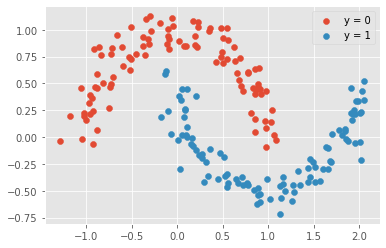

In [57]:
# Visualize the data
for label in data['y'].unique():
    subdata = data[data['y'] == label]
    plt.scatter(subdata['x1'], subdata['x2'], cmap=plt.cm.rainbow, label=("y = %d" % label))
plt.legend()
plt.show()

In [58]:
# Write your code here
# 1. Build an SVM model with polynomial kernel using the sklearn.svm.SVC class.

# Build an SVM model with polynomial kernel

from sklearn import svm
clf = svm.SVC(kernel='poly', degree = 3) # taken the degree = 3


In [59]:
# Write your code here
# 2. Train the model with data.

clf.fit(data[['x1', 'x2']], data['y']) #fitting input & output data



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
# Write your code here
# Show that the accuracy of the model on data is above 90%.

pred = clf.predict(data[['x1','x2']])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(data['y'], pred))


Accuracy: 0.95


## Question 4 (30 pts)

The following dataset contains 11 biomedical attributes of 720 individuals. You are expected to build a decision tree model on this dataset and find out who are more likely to have heart disease.

In [61]:
# Execute this cell to load the data.
import seaborn as sns
url = "https://github.com/SpiroGanas/Heart-Disease-Machine-Learning/raw/master/heart_disease_df.csv"
data2 = pd.read_csv(url, sep=',', index_col=0)
data2.drop(['slope', 'ca', 'thal', 'Source'], inplace=True, axis=1)
data2 = data2.dropna()
data2['diagnosis'] = (data2['diagnosis'] > 0).astype(int)
data2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0


Column information:

1. `age`
2. `sex`: 0 = female, 1 = male
3. `cp`: chest pain type (4 values)
4. `trestbps`: resting blood pressure
5. `chol`: serum cholestoral in mg/dl
6. `fbs`: fasting blood sugar > 120 mg/dl
7. `restecg`: resting electrocardiographic results (values 0,1,2)
8. `thalach`: maximum heart rate achieved
9. `exang`: exercise induced angina
10. `oldpeak`: ST depression induced by exercise relative to rest

The last column `diagnosis` is the target feature, where 1 means that the person has been diagnosed as having heart disease, and 0 means otherwise.

Please do the following:
1. Build a depth-3 decision tree classifier to prediction the `diagnosis` value from other features.
2. Visualize the model as a tree of conditions. You may need to include statement `plt.figure(figsize=(15, 15))` to make the plot readable.
3. Identify a group of conditions that lead to high risk of heart disease. Also identify a group of conditions that lead to low risk of heart disease.

3. Identify a group of conditions that lead to high risk of heart disease. Also identify a group of conditions that lead to low risk of heart disease.

**Write your answer here:** 
Heart Disease is very common in the seniors which is composed of age group 60 and above and common among adults which belong to the age group of 41 to 60. But it’s rare among the age group of 19 to 40 and very rare among the age group of 0 to 18.




In [ ]:
# Write your code here
# 1. Build a depth-3 decision tree classifier to prediction the diagnosis value from other features.
from sklearn.tree import plot_tree
# age: The person's age in years
# sex: The person's sex (1 = male, 0 = female)
# cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
# trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
# chol: The person's cholesterol measurement in mg/dl
# fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
# restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
# thalach: The person's maximum heart rate achieved   exang: Exercise induced angina (1 = yes; 0 = no)  
# oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# ca: The number of major vessels (0-3)
# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
# target: Heart disease (0 = no, 1 = yes)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data2 = data2.copy()
X = data2.iloc[:,0:13]  #independent columns
y = data2.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features




In [ ]:
# Write your code here
# 2. Visualize the model as a tree of conditions. You may need to include statement plt.figure(figsize=(10, 10)) to make the plot readable.
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

plt.figure(figsize=(10,10))
plot_tree(tree_clf, feature_name=X.columns, filled=true) 
plt.show



## Question 5 (20 pts)
1. Define a `relu()` function that represents the ReLU function defined as:
$$ ReLU(t) = \max\{0, t\}.$$
For example, `relu(0)` returns 0, `relu(5)` returns 5, and `relu(-5)` returns 0. This function will be used as the activation function of neurons in the next step.

In [62]:
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import tensorflow as tf
#f(x)=max(0,x)

In [63]:
# Code for relu():
def relu_function(x):
  if x>0:
	  return x
  else: 
    return 0
  relu_function(7), relu_function(-7)
  
  print(" relu_function(0):", relu_function(0))
  print(" relu_function(5):", relu_function(5))
  print(" relu_function(-5):", relu_function(-5))
  print(" relu_function(7):", relu_function(7))


In [64]:
relu_function(7), relu_function(-7)
relu_function(0), relu_function(0)
relu_function(5), relu_function(5)
relu_function(-5), relu_function(0)
relu_function(-7), relu_function(7)

(0, 7)

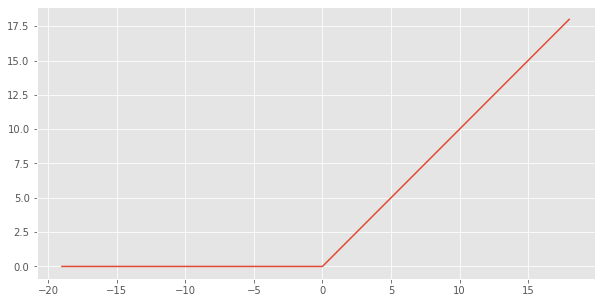

In [65]:
from matplotlib import pyplot
pyplot.style.use('ggplot')
pyplot.figure(figsize=(10,5))
# define a series of inputs
input_series = [x for x in range(-19, 19)]
# calculate outputs for our inputs
output_series = [ReLU(x) for x in input_series]
# line plot of raw inputs to rectified outputs
pyplot.plot(input_series, output_series)
pyplot.show()

2. Suppose that 3-layer neural network is defined as below:

<img src="https://github.com/ch00226855/ImputationGAN/blob/master/Test02Img02.png?raw=true" width="400">

The number near each arrow is the weight parameter associated with that connection. Suppose that there are no bias parameters.

Suppose that both neurons in the input layer receives value 1 from the data. Calculate and print the input and output of each neuron in the hidden layer and the output layer.

In [ ]:
# Write your calculations here:
# 2 (-.05)(1)+(-0.32)(1) = Ii = -0.82 relu(-.82) = 0
# 3 (1.01)(1)+(-0.24)(1) = Ii = 0.77 relu(0.77) = 0.77
# 4 (0.23)(1)+(-0.12)(1) = Ii = 0.11 relu(0.11) = 0.11
# 5 0(.15)+(1.32)+(.77)+9(-0.37)(.11) = Ii = .9757relu(.9757) = .9757

